In [1]:
print("hello")

hello


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/cleaned/cleaned_reviews.csv")
df.head()


,review,sentiment,clean_review,old_length,new_length
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1761,1665
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,998,936
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,926,874
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,748,685
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1317,1237


In [4]:
X = df["clean_review"]
y = df["sentiment"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [6]:
tfidf = TfidfVectorizer(
    max_features=20000,
    stop_words="english"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [7]:
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vec, y_train)
    preds = knn.predict(X_test_vec)
    
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)
    
    print(f"K = {k} → Accuracy = {acc:.4f}")


K = 1 → Accuracy = 0.7456
K = 3 → Accuracy = 0.7606
K = 5 → Accuracy = 0.7683
K = 7 → Accuracy = 0.7755
K = 9 → Accuracy = 0.7841


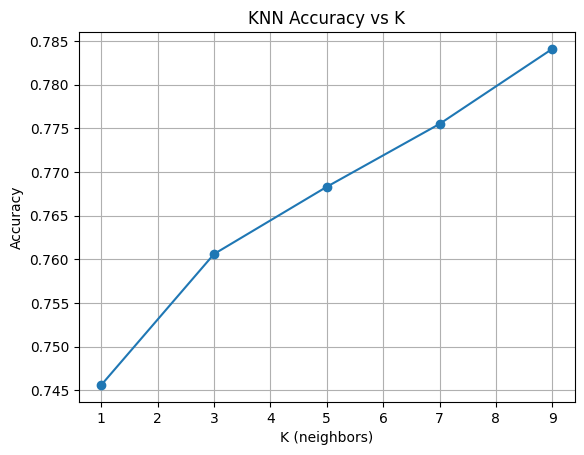

In [8]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("KNN Accuracy vs K")
plt.xlabel("K (neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [9]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Best K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_vec, y_train)
preds = knn.predict(X_test_vec)


Best K: 9


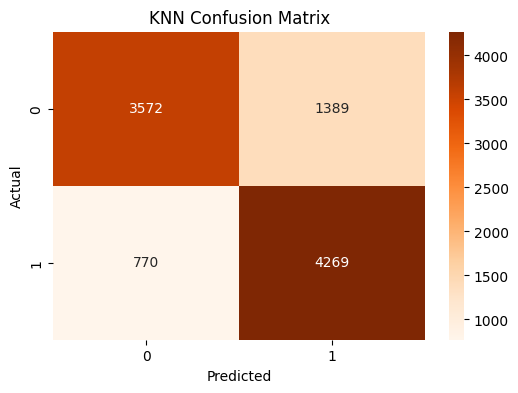

In [10]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

    negative       0.82      0.72      0.77      4961
    positive       0.75      0.85      0.80      5039

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [12]:
sample = ["The movie was awesome and I loved every moment"]
sample_vec = tfidf.transform(sample)
print("Prediction:", knn.predict(sample_vec)[0])


Prediction: positive
